<h1 style="text-align:center;width:100%;background-color:#242424;padding-left:10px;margin-bottom:0px; color:skyblue; border: solid 2px #DDD; width:95%">Clustring the Medical & Security venues per capita <br />Torento</h1>
<h3 style="text-align:left;width:100%;background-color:#ddd;padding-left:10px;;margin-top:0px;width:95%;border: solid 2px #DDD;"> <font size=2 color=#444>Developed by <font size=2 color=green>Reza Sadeghi Jafari </font>- March 2021 </font></h3>

# Introduction

This code developed in regard of Coursera assignment on course "Applied Data Science Capstone". It's required to explore, segment, and cluster the neighborhoods based on Medical And Security venues in the city of Toronto. The neighborhood data for torento is not readily available on the internet.

<h3><font color=green>Project Title:</font> Clustring the per capita medical and security venues  on
Torento neighborhoods</h3>
<h3> <font color=green>Client:</font>  Municipality - Development committee</h3>
<h3> <font color=green>Requirements:</font> </h3><h4> Development Committee at municipality need to identify the needs of neighborhood to medical center and security office to ensure that the facility distributaion adjusted on standard. this issue is very important which let them to plan about city development for next year. They need to cluster neighborhoods to 4 or 5 group to periorotize them for the next year plan.  



In [34]:
import pandas as pd
import numpy as np
import folium as fl
import geopy
from geopy.geocoders import Nominatim 
import json 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import seaborn as sns

<h4 ><font color=green>1- Data Gathering</font><br>
I use the Notebook to build the code to scrape the following Wikipedia page,<font color=skyblue> https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,</font> in order to obtain the data that is in the table of postal codes and to transform the data into a pandas  dataframe. </h4>

In [2]:
# Pandas read_html functuin is very handy to read data from pages, it's to fast and simple, just need to identfy the right datafarame.
# The orginal URL's content was changed so I change the url to read from history on wikipedia page which is sutible to export required data, it seems changed during this month
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1012118802'
dfs = pd.read_html(url)
df=dfs[0]   # it's retrive the first dataframe from all data frames which red by the "read_html" methode. 
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [3]:
df.describe() # I describe the dataframe to find some information about Dataframe

,Postal Code,Borough,Neighbourhood
count,180,180,180
unique,180,12,100
top,M5J,Not assigned,Not assigned
freq,1,77,77


In [4]:
# we have 180 rows of data which some of them are invalid, ('Not assigned')

df.info() # also .info would be helpful to review the null values, datatype, ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Postal Code    180 non-null    object
 1   Borough        180 non-null    object
 2   Neighbourhood  180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


<h3>start cleansing the data</h3>
<hr />
<span style='color:skyblue'>I remove the 'Not assigned' Borough from our records,</span>

In [5]:

Clean_df =df[df['Borough']!='Not assigned']
Clean_df.to_csv('out.csv', index=False,)

<div style='color:skyblue'> To remove the duplicate recorde and concatinate Neighbourhood values on same Borough values First i group by the dataframe by Borough then i used transform methode and lambda function on Neighbourhood values.</div>
<hr >


In [6]:
Clean_df['Neighbourhood']= Clean_df.groupby(['Postal Code','Borough'])['Neighbourhood'].transform(lambda x: ','.join(x))
Clean_df =Clean_df.drop_duplicates() # remove duplicate if exist
Clean_df.shape

<ipython-input-6-d7383de11b39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_df['Neighbourhood']= Clean_df.groupby(['Postal Code','Borough'])['Neighbourhood'].transform(lambda x: ','.join(x))


(103, 3)

<h4><font color=green> Note: </font>
After removing duplicate records, we have 103 records witch are unique on 'Postal Code','Borough'</h4>

<h4><font color=green> Note: </font> Retrive the geo data for each nighbourhood</h4>

In [7]:
geodf = pd.read_csv('Geospatial_Coordinates.csv')

In [8]:
geodf

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [9]:
# Join Nighbourhood data with geo data 
Toronto_df= Clean_df.set_index('Postal Code').join(geodf.set_index('Postal Code'))

In [10]:
Toronto_df

,Borough,Neighbourhood,Latitude,Longitude
Postal Code,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...
M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [11]:

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="Tr_explorer")
location = geolocator.geocode(address)
latt = location.latitude
long = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latt, long))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [12]:
city_map = fl.Map(location=[latt, long], zoom_start=10)

In [13]:
for lat, lng, borough, neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighbourhood']):
    label = '{}, {}'.format(Toronto_df, borough)
    label = fl.Popup(label, parse_html=True)
    fl.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(city_map)  
city_map

<h4><font color=green>Load Venue Data By seraching on foursquare data.</h4> 

In [14]:
CLIENT_ID = 'SSNWMNIKVK3MUF3S5TYVPHMAPVJNWQV5OKUMCMXKIXY1CJKC' 
CLIENT_SECRET = '4S4OOXG1NGKOTSONE0RTRGGAG05YE5VOIXOTGC4QO0JBTBQQ'
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SSNWMNIKVK3MUF3S5TYVPHMAPVJNWQV5OKUMCMXKIXY1CJKC
CLIENT_SECRET:4S4OOXG1NGKOTSONE0RTRGGAG05YE5VOIXOTGC4QO0JBTBQQ


In [15]:
#This function search venues list around a place, for example all schools neer a geo location 
#--------------------------------------------------------------------------------------------#
def getSearchVenues(names, latitudes, longitudes,query, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            query)
            
        # make the GET request
        print(requests.get(url).json())
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            query) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# List Of Venue
medicalcenter ='Medical Center,Hospital'
Security='Police Station,Fire Station'
 

In [177]:

Toronto_medical = getSearchVenues(names=Toronto_df['Neighbourhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude'],
                                   query=medicalcenter
                                  )
Toronto_medical

73375853445, 'labeledLatLngs': [{'label': 'display', 'lat': 43.631592751121936, 'lng': -79.55373375853445}], 'distance': 4498, 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Cloverdale Mall', 'Etobicoke ON', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d177941735', 'name': "Doctor's Office", 'pluralName': "Doctor's Offices", 'shortName': "Doctor's Office", 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1619364694', 'hasPerk': False}, {'id': '4c9238ed2626a1cd13ad386b', 'name': 'Mount dennis medical centre', 'location': {'lat': 43.685186, 'lng': -79.490081, 'labeledLatLngs': [{'label': 'display', 'lat': 43.685186, 'lng': -79.490081}], 'distance': 3763, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d104941735', 'name': 'Medical Center', 'p

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Parkway Forest Medical Center,43.773870,-79.341333,"Medical Center,Hospital"
1,Parkwoods,43.753259,-79.329656,Village Square Medical Centre,43.793948,-79.329890,"Medical Center,Hospital"
2,Parkwoods,43.753259,-79.329656,Sanjiu Medical Centre,43.805815,-79.338788,"Medical Center,Hospital"
3,Victoria Village,43.725882,-79.315572,Warden Woods Medical Center III,43.705399,-79.251213,"Medical Center,Hospital"
4,Victoria Village,43.725882,-79.315572,Rumsey Medical Centre,43.712641,-79.369999,"Medical Center,Hospital"
...,...,...,...,...,...,...,...
595,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,Dundas Medical Centre,43.654180,-79.451746,"Medical Center,Hospital"
596,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,Mount dennis medical centre,43.685186,-79.490081,"Medical Center,Hospital"
597,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,Appletree Medical Centre,43.615002,-79.557114,"Medical Center,Hospital"
598,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Dr. Pich - Cloverdale Medical Center,43.631593,-79.553734,"Medical Center,Hospital"


In [178]:
Toronto_Security = getSearchVenues(names=Toronto_df['Neighbourhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude'],
                                   query=Security
                                  )
Toronto_Security

name': 'Toronto Fire Station 227', 'location': {'address': '1904 Queen St E', 'crossStreet': 'at Herbert Ave.', 'lat': 43.66913933650805, 'lng': -79.30491897717998, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66913933650805, 'lng': -79.30491897717998}], 'distance': 1517, 'postalCode': 'M4L 1H3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1904 Queen St E (at Herbert Ave.)', 'Toronto ON M4L 1H3', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d12c941735', 'name': 'Fire Station', 'pluralName': 'Fire Stations', 'shortName': 'Fire Station', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_firestation_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1619366410', 'hasPerk': False}, {'id': '4dbc5e8443a1d8504b8a1883', 'name': 'Toronto Fire Station 335', 'location': {'address': '235 Cibola Ave', 'lat': 43.62536991207173, 'lng': -79.35947825165826, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6253699

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Toronto Fire Station 115,43.775000,-79.339402,"Police Station,Fire Station"
1,Parkwoods,43.753259,-79.329656,Toronto Fire Station 245,43.762780,-79.293528,"Police Station,Fire Station"
2,Parkwoods,43.753259,-79.329656,Toronto Fire Station 123,43.745786,-79.346091,"Police Station,Fire Station"
3,Parkwoods,43.753259,-79.329656,Toronto Fire Services - Station 235,43.725198,-79.313500,"Police Station,Fire Station"
4,Parkwoods,43.753259,-79.329656,Toronto Fire Services - Station 232,43.718733,-79.338005,"Police Station,Fire Station"
...,...,...,...,...,...,...,...
1112,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Toronto Police Station,43.617269,-79.510235,"Police Station,Fire Station"
1113,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Toronto Fire Station 433,43.629398,-79.503579,"Police Station,Fire Station"
1114,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Toronto Fire Station 432,43.623603,-79.549710,"Police Station,Fire Station"
1115,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Toronto Fire Station 445,43.649620,-79.545340,"Police Station,Fire Station"


In [179]:
Toronto_medical.set_index('Neighbourhood')
Toronto_Security.set_index('Neighbourhood')


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Parkwoods,43.753259,-79.329656,Toronto Fire Station 115,43.775000,-79.339402,"Police Station,Fire Station"
Parkwoods,43.753259,-79.329656,Toronto Fire Station 245,43.762780,-79.293528,"Police Station,Fire Station"
Parkwoods,43.753259,-79.329656,Toronto Fire Station 123,43.745786,-79.346091,"Police Station,Fire Station"
Parkwoods,43.753259,-79.329656,Toronto Fire Services - Station 235,43.725198,-79.313500,"Police Station,Fire Station"
Parkwoods,43.753259,-79.329656,Toronto Fire Services - Station 232,43.718733,-79.338005,"Police Station,Fire Station"
...,...,...,...,...,...,...
"Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West",43.628841,-79.520999,Toronto Police Station,43.617269,-79.510235,"Police Station,Fire Station"
"Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West",43.628841,-79.520999,Toronto Fire Station 433,43.629398,-79.503579,"Police Station,Fire Station"
"Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West",43.628841,-79.520999,Toronto Fire Station 432,43.623603,-79.549710,"Police Station,Fire Station"


In [180]:
# I save the result, becuase i use free account on 
Toronto_medical.to_csv(r'Toronto_medical.csv', index = True, header=True)
Toronto_Security.to_csv(r'Toronto_Security.csv', index = True, header=True)

In [17]:
Toronto_medical= pd.read_csv(r'D:\MyWorkSpace\Online\corsera\Toronto_medical.csv')
Toronto_Security= pd.read_csv(r'D:\MyWorkSpace\Online\corsera\Toronto_Security.csv')

In [18]:
Toronto_medical.set_index('Neighbourhood',inplace=True)
Toronto_medical =Toronto_medical['Venue']

In [19]:
Toronto_Security.set_index('Neighbourhood',inplace=True)
Toronto_Security = Toronto_Security['Venue']

In [20]:
Toronto_medical_aggr=Toronto_medical.groupby('Neighbourhood').count().reset_index(name="med_Venue")
Toronto_Security_aggr=Toronto_Security.groupby('Neighbourhood').count().reset_index(name="sec_Venue")

In [21]:
result = pd.merge(Toronto_df.reset_index(), Toronto_medical_aggr, how="outer", on=['Neighbourhood'])
result = pd.merge(result, Toronto_Security_aggr, how="outer", on=['Neighbourhood'])
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postal Code    103 non-null    object 
 1   Borough        103 non-null    object 
 2   Neighbourhood  103 non-null    object 
 3   Latitude       103 non-null    float64
 4   Longitude      103 non-null    float64
 5   med_Venue      103 non-null    int64  
 6   sec_Venue      103 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 6.4+ KB


In [22]:
result

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,med_Venue,sec_Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,3,7
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,9
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,8,21
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4,9
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,12,23
...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,3,8
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,11,22
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,7,15
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,4,7


In [23]:
# get population data
# from https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Table.cfm?Lang=Eng&T=1201&SR=1&S=22&O=A&RPP=9999&PR=0
# on csv file T120120210401031248.CSV and clean the CV file by removing the 2nd row and desciption in tail of file
df_population = pd.read_csv(r'totonto_pop.CSV',encoding="utf-8")
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic code        1641 non-null   object
 1   Geographic name        1641 non-null   object
 2   Province or territory  1641 non-null   object
 3   Population             1641 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 51.4+ KB


In [24]:
df_population.rename(columns={'Geographic code':'Postal Code'},inplace=True)
df_population.drop(columns={'Geographic name',	'Province or territory'},inplace=True)
df_population

,Postal Code,Population
0,A0A,46587
1,A0B,19792
2,A0C,12587
3,A0E,22294
4,A0G,35266
...,...,...
1636,X0G,500
1637,X1A,20054
1638,Y0A,1641
1639,Y0B,6561


In [25]:
result_final = pd.merge(result, df_population, how="inner", on=['Postal Code'])
result_final 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,med_Venue,sec_Venue,Population
0,M3A,North York,Parkwoods,43.753259,-79.329656,3,7,34615
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,9,14443
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,8,21,41078
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4,9,21048
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,12,23,10
...,...,...,...,...,...,...,...,...
97,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,3,8,10787
98,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,11,22,30472
99,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,7,15,10
100,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,4,7,21299


In [26]:
result_final = pd.merge(result, df_population, how="inner", on=['Postal Code'])
#remove unnormal population data
result_final = result_final[result_final['Population']>1000]
# to claculate the destribution of Venues per population, Add Venue/population rate for each Venue
result_final['Medical_Venue'] = result_final['med_Venue']/result_final['Population']
result_final['Security_Venue'] = result_final['sec_Venue']/result_final['Population']
result_grouped =result_final.drop(columns={'Postal Code','Borough','Latitude','Longitude','med_Venue','sec_Venue','Population'}) #'edu_Venue','grc_Venue',
result_grouped["Medical_Venue"]=result_grouped["Medical_Venue"].fillna(0)
result_grouped["Security_Venue"]=result_grouped["Security_Venue"].fillna(0)
result_grouped

,Neighbourhood,Medical_Venue,Security_Venue
0,Parkwoods,0.000087,0.000202
1,Victoria Village,0.000208,0.000623
2,"Regent Park, Harbourfront",0.000195,0.000511
3,"Lawrence Manor, Lawrence Heights",0.000190,0.000428
5,"Islington Avenue, Humber Valley Village",0.000056,0.000169
...,...,...,...
95,"St. James Town, Cabbagetown",0.000528,0.001153
97,"The Kingsway, Montgomery Road, Old Mill North",0.000278,0.000742
98,Church and Wellesley,0.000361,0.000722
100,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.000188,0.000329


In [27]:
result_grouped.describe()

,Medical_Venue,Security_Venue
count,96.000000,96.000000
mean,0.000373,0.000713
std,0.000606,0.001284
min,0.000025,0.000025
25%,0.000098,0.000141
50%,0.000197,0.000312
75%,0.000361,0.000802
max,0.004489,0.009975


<h3>Analyze the data </h3>
<hr />
At first divide the Venues per capita on 5 part (0,25%,50%,75%,Max)
for that i defin 2 function for each categories.


In [28]:
def Medical_level(row):
    if row['Medical_Venue']==0 : return 0
    if row['Medical_Venue'] >0.000025 and row['Medical_Venue'] <=0.000098 : return 1
    if row['Medical_Venue'] >0.000098 and row['Medical_Venue']<=0.000197 : return 2
    if row['Medical_Venue']>0.000197 and row['Medical_Venue'] <=0.000361 : return 3
    else: return 4
    return result
def Police_level(row,):
    if row['Security_Venue']==0 : return 0
    if row['Security_Venue']>0.000025 and row['Security_Venue'] <=0.000141 : return 1
    if row['Security_Venue'] >0.000141 and row['Security_Venue']<=0.000312 : return 2
    if row['Security_Venue']>0.000312 and row['Security_Venue'] <=0.000802 : return 3
    else: return 4
    return result

In [29]:

result_grouped["med_level"]= result_grouped.apply(lambda row : Medical_level(row) , axis=1)
result_grouped["sec_level"]= result_grouped.apply(lambda row : Police_level(row), axis=1)


In [30]:
result_grouped

,Neighbourhood,Medical_Venue,Security_Venue,med_level,sec_level
0,Parkwoods,0.000087,0.000202,1,2
1,Victoria Village,0.000208,0.000623,3,3
2,"Regent Park, Harbourfront",0.000195,0.000511,2,3
3,"Lawrence Manor, Lawrence Heights",0.000190,0.000428,2,3
5,"Islington Avenue, Humber Valley Village",0.000056,0.000169,1,2
...,...,...,...,...,...
95,"St. James Town, Cabbagetown",0.000528,0.001153,4,4
97,"The Kingsway, Montgomery Road, Old Mill North",0.000278,0.000742,3,3
98,Church and Wellesley,0.000361,0.000722,3,3
100,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.000188,0.000329,2,3


<h3> Clustering </h3>
<hr />
<h4> Apply the model and visualization </h4>

In [95]:
# set number of clusters
kclusters = 5
toronto_grouped_clustering = result_grouped.drop(['Medical_Venue','Security_Venue'], 1)
# run k-means clustering
traindata = toronto_grouped_clustering[['Neighbourhood','med_level','sec_level']]
traindata = traindata.set_index('Neighbourhood')
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(traindata)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 3, 2, 2, 1, 1, 1, 2, 0, 4,
       0, 2, 2, 4, 0, 1, 2, 2, 0, 4, 1, 3, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0,
       0, 1, 2, 3, 3, 4, 4, 3, 0, 0, 1, 4, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2,
       3, 1, 3, 3, 2, 2, 2, 1, 4, 0, 2, 3, 3, 2, 2, 4, 2, 0, 1, 1, 4, 2,
       1, 2, 4, 2, 0, 0, 0, 3])

In [96]:
if ('Cluster Labels' not in  toronto_grouped_clustering.columns):
    toronto_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_) 
Torento_merged = result_final
# merge Torento_merged with Torento_df to add latitude/longitude for each neighbourhood
Torento_merged = Torento_merged.join(toronto_grouped_clustering.set_index('Neighbourhood'), on='Neighbourhood')
Torento_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,med_Venue,sec_Venue,Population,Medical_Venue,Security_Venue,Cluster Labels,med_level,sec_level
0,M3A,North York,Parkwoods,43.753259,-79.329656,3,7,34615,0.000087,0.000202,1,1,2
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,9,14443,0.000208,0.000623,0,3,3
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,8,21,41078,0.000195,0.000511,0,2,3
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4,9,21048,0.000190,0.000428,0,2,3
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,2,6,35594,0.000056,0.000169,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,11,24,20822,0.000528,0.001153,2,4,4
97,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,3,8,10787,0.000278,0.000742,0,3,3
98,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,11,22,30472,0.000361,0.000722,0,3,3
100,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,4,7,21299,0.000188,0.000329,0,2,3


In [97]:
# create map
map_clusters = fl.Map(location=[latt, long], zoom_start=11)

#set color scheme for the clusters
x = np.arange(kclusters)
ys =  [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, 6))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Torento_merged['Latitude'], Torento_merged['Longitude'], Torento_merged['Neighbourhood'], Torento_merged['Cluster Labels']):
    label = fl.Popup(str(poi) + '\n\t Cluster : ' + str(cluster) , parse_html=True)
    fl.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The above digram cluster the nighbourhoods which have same distrubution of Medical venue or Security Office per capita for each person.


In [98]:
Torento_result = Torento_merged.groupby('Cluster Labels')['Neighbourhood'].count()

<AxesSubplot:ylabel='Neighbourhood'>

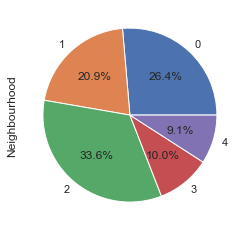

In [99]:
Torento_result.plot.pie(autopct="%.1f%%")